## World Happiness Report Project

### Problem Statement

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing Data set

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Columns:
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

### To predict:
Happiness score

### Exploratory Data Analysis(EDA)

In [3]:
#Checking the shape
df.shape

(158, 12)

Our data set contains 158 columns and 12 columns out of which, 11 columns are features and 1 column is our target variable.

In [4]:
#Checking the columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

The column names present in the data set.

In [5]:
#Checking the data type
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

The type of data present in our data set. Here we have 2 object data, 1 int data and 9 float data.

In [6]:
#Checking for null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We can see there are no null values present in our data set. Let's go ahead.

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The describe method gives the statistical information about the dataset.

In [8]:
#Let's check for correlation between them
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


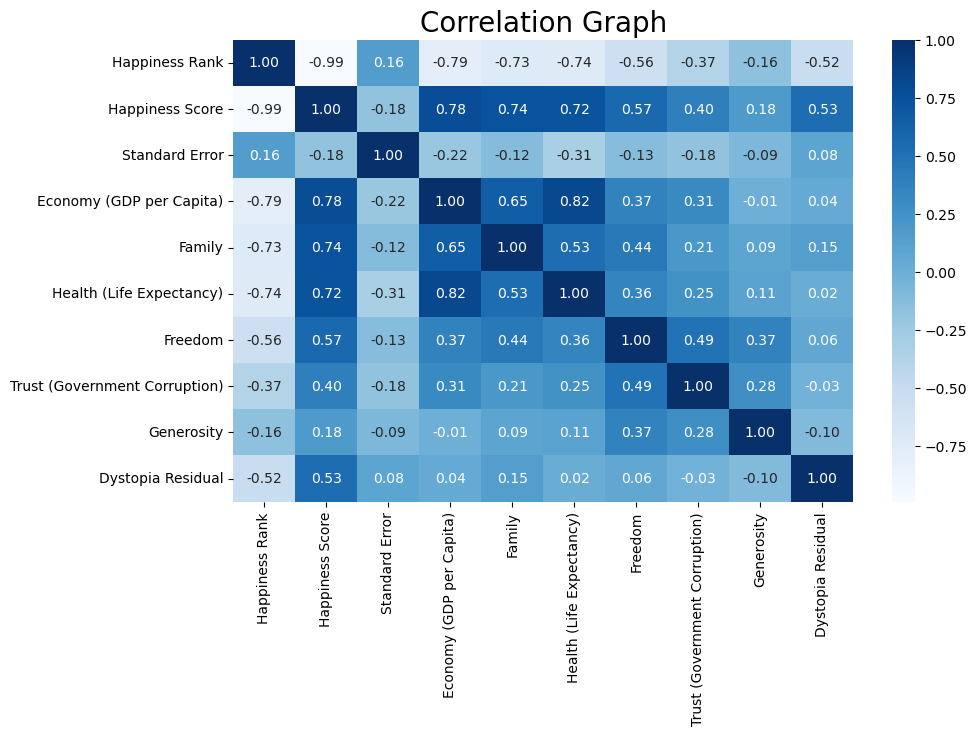

In [9]:
#Let's plot a heatmap for visualizing the correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', linecolor='black', cmap='Blues')    
plt.title('Correlation Graph', fontsize=20)
plt.show()

From the above heatmap we can see that Happiness Score has 78% positive correlation with Economy (GDP per Capita), then lies Family with 74% positive correlation, then Health with 72% positive correlation with Happiness Score.

We can see the Country and Region columns are categorical which will create some problem if we do not convert them into numerical. So, in order to convert them into numerical, let's use Ordinal Encoder.

In [12]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df        

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Now, we have successfully converted those categorical values to numerical. Let's go ahead.

### Data Visualization

#### Bivariate Analysis

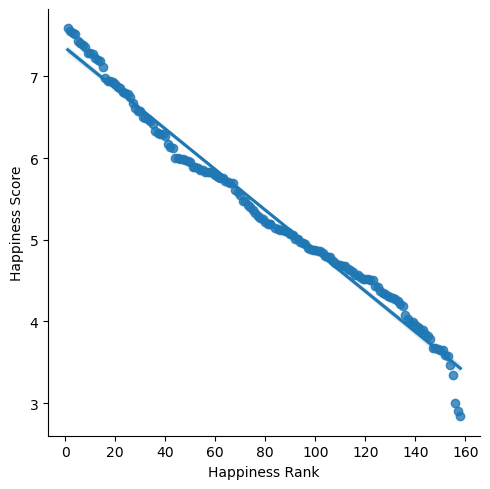

In [13]:
sns.lmplot(x= 'Happiness Rank', y= 'Happiness Score', data=df, palette='colorblind')

As we can see, Happiness Rank has a high negative relation with Happiness Score.

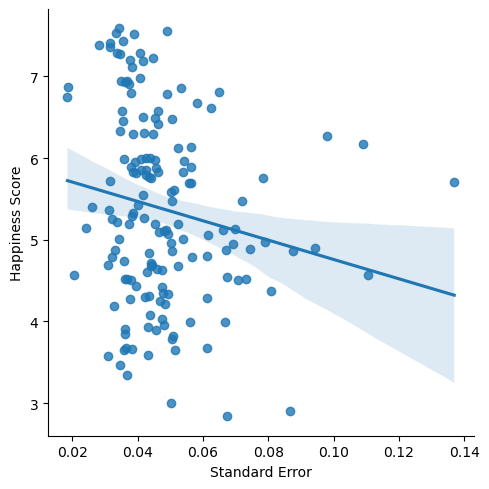

In [14]:
sns.lmplot(x= 'Standard Error', y= 'Happiness Score', data=df, palette='colorblind')

There is a negative relation between them.

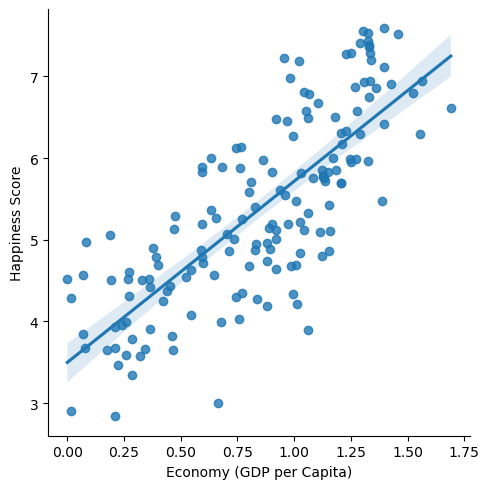

In [15]:
sns.lmplot(x= 'Economy (GDP per Capita)', y= 'Happiness Score', data=df, palette='colorblind')

Here, we can see that there is a high positive relation between Happiness Score and Economy.

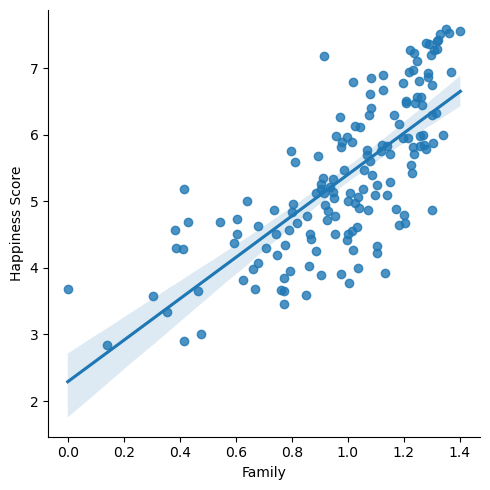

In [16]:
sns.lmplot(x= 'Family', y= 'Happiness Score', data=df, palette='colorblind')

We can see a positive relation between Family and our label.

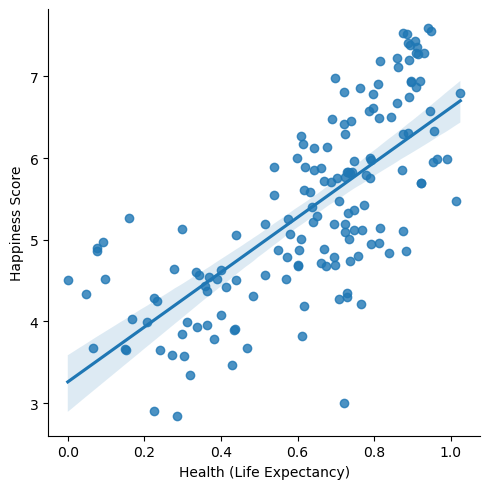

In [17]:
sns.lmplot(x= 'Health (Life Expectancy)', y= 'Happiness Score', data=df, palette='colorblind')

Here, there is a positive relation between Health and Happiness Score.

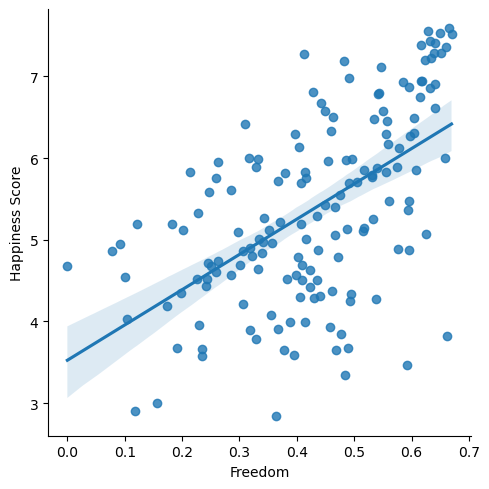

In [18]:
sns.lmplot(x= 'Freedom', y= 'Happiness Score', data=df, palette='colorblind')

There is a positive relation between them.

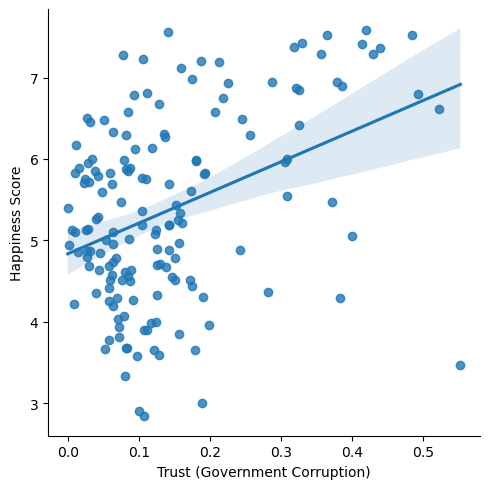

In [19]:
sns.lmplot(x= 'Trust (Government Corruption)', y= 'Happiness Score', data=df, palette='colorblind')

There is a slightly positive relation between them.

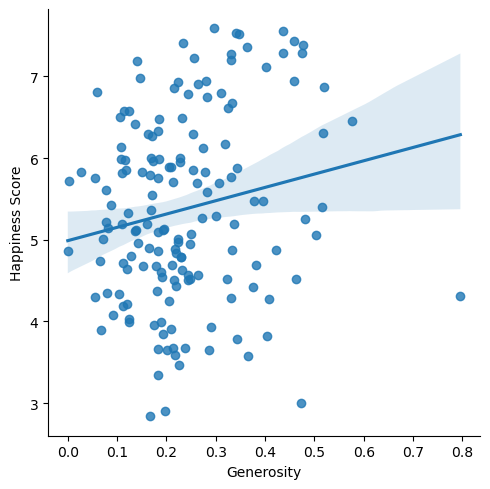

In [20]:
sns.lmplot(x= 'Generosity', y= 'Happiness Score', data=df, palette='colorblind')

Slight positive relation between them.

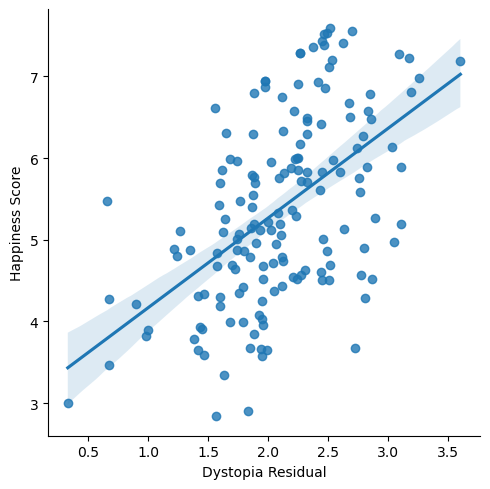

In [21]:
sns.lmplot(x= 'Dystopia Residual', y= 'Happiness Score', data=df, palette='colorblind')

There is a high positive relation between them.

### Separating Features and Label

In [22]:
x = df.drop("Happiness Score", axis=1)
y = df["Happiness Score"]

In [23]:
print(x.shape)
print(y.shape)

(158, 11)
(158,)


In [24]:
y.value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

### Feature Scaling using Standard Scaler

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,-1.721000,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-0.449465,1.300256,-1.699075,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.909893,1.300256,-1.677149,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,-1.655224,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.194920,-0.040302,-1.633299,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.436096,0.965117,1.655501,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,1.260695,-0.375441,1.677427,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-1.260695,0.965117,1.699352,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


### Checking VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.082092,Country
1,1.455402,Region
2,76.549524,Happiness Rank
3,1.188841,Standard Error
4,13.586284,Economy (GDP per Capita)
5,5.636951,Family
6,8.136093,Health (Life Expectancy)
7,3.258351,Freedom
8,2.044527,Trust (Government Corruption)
9,2.124602,Generosity


### Model Training

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [26]:
#Finding the best random state
maxR2 = 0
maxRS = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxR2:
        maxR2=acc
        maxRS=i
print("Maximum r2 score is ", maxR2, "on Random_state ", maxRS)

Maximum r2 score is  0.9999999636563749 on Random_state  72


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=72)

In [33]:
x_train

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
129,48.0,1.0,130,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541
92,83.0,1.0,93,0.05376,0.91851,1.00232,0.73545,0.33457,0.05327,0.22359,1.73933
112,127.0,8.0,113,0.04585,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956
23,123.0,6.0,24,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
150,66.0,8.0,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
...,...,...,...,...,...,...,...,...,...,...,...
69,145.0,1.0,70,0.04175,0.95847,1.22668,0.53886,0.47610,0.30844,0.16979,1.86984
101,51.0,9.0,102,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101
74,154.0,6.0,75,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
46,128.0,2.0,47,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978


In [34]:
y_train

129    4.297
92     5.007
112    4.642
23     6.798
150    3.655
       ...  
69     5.548
101    4.857
74     5.360
46     5.984
19     6.901
Name: Happiness Score, Length: 118, dtype: float64

In [51]:
#Importing differenet regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.svm import SVR

### Model Building

#### Linear Regression

In [36]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_lr))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lr)))

R2 Score: 0.9999999636563749
R2 Score on training data: 99.99999259502817
Mean Absolute Error: 0.0002371820241596989
Mean Squared Error: 7.495704770506934e-08
Root Mean Squared Error: 0.0002737828477188981


Wow! We got 99% ~ 100% R2 score, great!

#### Random Forest Regressor

In [37]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)
pred_train = rfr.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_rfr))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rfr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rfr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_rfr)))

R2 Score: 0.9913847466600038
R2 Score on training data: 99.94081815248867
Mean Absolute Error: 0.07321775000000007
Mean Squared Error: 0.01776856196749979
Root Mean Squared Error: 0.13329876956483802


#### Decision Tree Regressor

In [38]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
pred_train = dt.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_dt))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dt))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_dt)))

R2 Score: 0.9958424280774707
R2 Score on training data: 100.0
Mean Absolute Error: 0.07364999999999991
Mean Squared Error: 0.008574799999999994
Root Mean Squared Error: 0.09260021598246947


#### KNeighbors Regressor

In [39]:
kn = KNeighborsRegressor()
kn.fit(x_train, y_train)
pred_kn = kn.predict(x_test)
pred_train = kn.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_kn))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_kn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_kn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_kn)))

R2 Score: 0.9614744596478652
R2 Score on training data: 97.91095481631011
Mean Absolute Error: 0.1925049999999999
Mean Squared Error: 0.07945714699999995
Root Mean Squared Error: 0.2818814413898154


#### Lasso Regression

In [40]:
ls = Lasso()
ls.fit(x_train, y_train)
pred_ls = ls.predict(x_test)
pred_train = ls.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_ls))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ls))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ls))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_ls)))

R2 Score: 0.9793447448445939
R2 Score on training data: 98.35298978555315
Mean Absolute Error: 0.1351217566324418
Mean Squared Error: 0.04260050943359872
Root Mean Squared Error: 0.20639890850873877


#### Ridge Regression

In [41]:
rr = Ridge()
rr.fit(x_train, y_train)
pred_rr = rr.predict(x_test)
pred_train = rr.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_rr))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_rr)))

R2 Score: 0.9885452052412537
R2 Score on training data: 99.1342811492107
Mean Absolute Error: 0.09823688763456223
Mean Squared Error: 0.023624984949759543
Root Mean Squared Error: 0.15370421253095032


#### Gradient Boosting Regressor

In [43]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred_gb = gb.predict(x_test)
pred_train = gb.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_gb))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_gb))
print('Mean Squared Error:', mean_squared_error(y_test, pred_gb))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_gb)))

R2 Score: 0.9960890180660364
R2 Score on training data: 99.99986227697157
Mean Absolute Error: 0.05364521438113755
Mean Squared Error: 0.008066219541657042
Root Mean Squared Error: 0.0898121347127271


#### Extra Trees Regressor

In [52]:
et = ExtraTreesRegressor()
et.fit(x_train, y_train)
pred_et = et.predict(x_test)
pred_train = gb.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_et))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_et))
print('Mean Squared Error:', mean_squared_error(y_test, pred_et))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_et)))

R2 Score: 0.9924453967943978
R2 Score on training data: 99.99986227697157
Mean Absolute Error: 0.07548650000000065
Mean Squared Error: 0.015581020069999865
Root Mean Squared Error: 0.12482395631448262


#### SVM

In [53]:
sv = SVR()
sv.fit(x_train, y_train)
pred_sv = sv.predict(x_test)
pred_train = sv.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_sv))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_sv))
print('Mean Squared Error:', mean_squared_error(y_test, pred_sv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_sv)))

R2 Score: 0.962800288944475
R2 Score on training data: 97.74120639477766
Mean Absolute Error: 0.17545428395067944
Mean Squared Error: 0.07672268533237016
Root Mean Squared Error: 0.2769886014484534


Among all these regression models we see that Linear Regression works best with 99.99% R2 score. Let's see what happens further.

### Cross Validation Score

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
#Linear Regression
score = cross_val_score(lr, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_lr) - score.mean())*100)

[0.99999949 0.99999846 0.9999983  0.99999563 0.99999934]
0.9999982417917263
Difference between R2 score and cross validation score is: 0.00017218646486405476


In [56]:
#Random Forest
score = cross_val_score(rfr, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_rfr) - score.mean())*100)

[-3.88719292 -0.73001418 -0.4988484  -0.80988441 -2.31045231]
-1.6472784450042994
Difference between R2 score and cross validation score is: 263.86631916643034


In [57]:
#Decision Tree
score = cross_val_score(dt, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_dt) - score.mean())*100)

[-3.1139095  -0.45318903 -0.61053755 -0.77597147 -2.07180796]
-1.4050831008090565
Difference between R2 score and cross validation score is: 240.09255288865273


In [58]:
#KNeighbors
score = cross_val_score(kn, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_kn) - score.mean())*100)

[-8.68921501 -1.99484233 -1.56438341 -6.24520162 -4.20151545]
-4.539031564324791
Difference between R2 score and cross validation score is: 550.0506023972656


In [59]:
#Lasso
score = cross_val_score(ls, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_ls) - score.mean())*100)

[-39.5383371   -6.65416738   0.19125992 -17.96627696 -23.65659767]
-17.524823840209333
Difference between R2 score and cross validation score is: 1850.4168585053926


In [60]:
#Ridge
score = cross_val_score(rr, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_rr) - score.mean())*100)

[0.96450428 0.98479059 0.9939878  0.97660693 0.98761411]
0.9815007414967152
Difference between R2 score and cross validation score is: 0.7044463744538487


In [61]:
#Gradient Boosting
score = cross_val_score(gb, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_gb) - score.mean())*100)

[-2.94031255 -0.29701985 -0.29121706 -0.37939938 -1.90589897]
-1.1627695613338005
Difference between R2 score and cross validation score is: 215.88585793998368


In [62]:
#Extra Trees
score = cross_val_score(et, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_et) - score.mean())*100)

[-3.62323764  0.68494017  0.94752203  0.89083122 -2.11908233]
-0.6438053099065606
Difference between R2 score and cross validation score is: 163.62507067009585


In [63]:
#SVM
score = cross_val_score(sv, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_sv) - score.mean())*100)

[-11.34393944   0.08720758   0.8857461   -0.59754963  -6.67989952]
-3.5296869816882306
Difference between R2 score and cross validation score is: 449.2487270632705


Here, we notice that Linear Regression works better as compared to others as it has the least difference between R2 and cross validation score. And we got 99.99% Score. Great!

As Linear Regression does not have any parameters that can be tuned, so no hyper parameter tuning can be performed.

That's it! We are done!